# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [13]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [14]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [15]:
data

{'items': [],
 'found': 0,
 'pages': 1,
 'page': 0,
 'per_page': 10,
 'clusters': None,
 'arguments': None,
 'fixes': None,
 'suggests': None,
 'alternate_url': 'https://hh.ru/search/vacancy?area=1&enable_snippets=true&items_on_page=10&text=%D0%A4%D0%B8%D0%B7%D0%B8%D0%BA-%D1%8F%D0%B4%D0%B5%D1%80%D1%89%D0%B8%D0%BA'}

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [16]:
def vacancies_on_page(job, page):
    URL = 'https://api.hh.ru/vacancies'

    params = {
    'text': job,
    'area': 1,
    'page': page,
    'per_page': 10
    }

    data = requests.get(URL, params).json()

    return data

def search_vacancies(job):
    vacancies = [];
    pages_number = vacancies_on_page(job, 0)["pages"]
    for i in range(pages_number):
        vacancies += vacancies_on_page(job, i)["items"]

    return vacancies;



jobs = ["Режиссер", "Дальнобойщик", "Хореограф", "Флорист","Клеевар"]
vacancies_for_jobs = {};

for job in jobs:
  vacancies_for_jobs[job] = search_vacancies(job)

vacancies_for_jobs

{'Режиссер': [{'id': '98080334',
   'premium': False,
   'name': 'Помощник режиссера',
   'department': None,
   'has_test': False,
   'response_letter_required': False,
   'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
   'salary': {'from': 40000, 'to': 70000, 'currency': 'RUR', 'gross': True},
   'type': {'id': 'open', 'name': 'Открытая'},
   'address': {'city': 'Москва',
    'street': 'улица Малая Ордынка',
    'building': '31с1',
    'lat': 55.733624,
    'lng': 37.626008,
    'description': None,
    'raw': 'Москва, улица Малая Ордынка, 31с1',
    'metro': {'station_name': 'Третьяковская',
     'line_name': 'Калужско-Рижская',
     'station_id': '6.90',
     'line_id': '6',
     'lat': 55.74073,
     'lng': 37.625624},
    'metro_stations': [{'station_name': 'Третьяковская',
      'line_name': 'Калужско-Рижская',
      'station_id': '6.90',
      'line_id': '6',
      'lat': 55.74073,
      'lng': 37.625624}],
    'id': '11673849'},
   'response_url': N

(1 балл) Посчитайте сколько всего найдено вакансий:

In [17]:
vacancies_number = 0
for job in jobs:
  vacancies_number += len(vacancies_for_jobs[job])
vacancies_number

809

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [18]:
class Company:
    def __init__(self, name, coordinates, salary):
      self.name = name
      self.coordinates = coordinates
      self.salary = salary #не требуется по этому пункту, но нужно для вывода

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [19]:
companies_for_jobs = {}
for job in jobs:
    companies_for_jobs[job] = []
    for vacancy in vacancies_for_jobs[job]:
        if vacancy.get("address") == None:
          address = (None, None)
        else:
          address = (vacancy["address"].get("lat"), vacancy["address"].get("lng"))
        if vacancy.get("salary") == None:
          salary = (None, None)
        else:
          salary = (vacancy["salary"].get("from"), vacancy["salary"].get("to"))
        company = Company(vacancy['employer']["name"], address, salary)
        companies_for_jobs[job].append(company)
for job in jobs:
    print(job)
    for company in companies_for_jobs[job]:
        print('   ', company.name, company.coordinates)

Режиссер
    ГБУК г. Москвы Театр На Малой Ордынке (55.733624, 37.626008)
    Телеканал Россия, ГТК (55.781975, 37.574983)
    Яндекс (None, None)
    Mayd Production (55.77637, 37.571426)
    ARTCASTA (55.741059, 37.707431)
    Tentura pictures (55.697072, 37.55381)
    J’MA (None, None)
    Центр компетенций Умный город (55.76643, 37.613701)
    МЕДИА1 (55.773039, 37.665704)
    Меркатор, Группа (55.786748, 37.580723)
    Bizarre Creative Studio (None, None)
    Караоке-ресторан LALALAND (None, None)
    Шелехова Яна Валерьевна (55.755864, 37.617698)
    Воробьев Р. А. (None, None)
    Ачетыре (None, None)
    Мочалов Дмитрий Александрович (None, None)
    МЕДИА1 (55.773039, 37.665704)
    Конкина Виктория Викторовна (None, None)
    Mayd Production (55.77637, 37.571426)
    Медиа Бизнес Солюшенс (55.783686, 37.560107)
    Оками (55.650145, 37.539626)
    Volka (34.687014, 33.036281)
    Shop&Show (55.799178, 37.604771)
    Angels & Company (55.765088, 37.616027)
    Hello.IO (55.740

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [20]:
coordinates_counter = 0
companies_with_coordinates = {}
for job in jobs:
    companies_with_coordinates[job] = []
    for company in companies_for_jobs[job]:
        if company.coordinates[0] != None and company.coordinates[1] != None:
          coordinates_counter += 1
          companies_with_coordinates[job].append(company)
coordinates_counter

670

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [27]:
import math

earth_radius = 6371

def distance(first_point, second_point):
    first_latitude = first_point[0] * math.pi / 180
    first_longitude = first_point[1] * math.pi / 180
    second_latitude = second_point[0] * math.pi / 180
    second_longitude = second_point[1] * math.pi / 180
    delta_latitude = first_latitude - second_latitude
    delta_longitude = first_longitude - second_longitude
    distance_in_radians = math.asin(math.sqrt((1 - math.cos(delta_latitude) +
                                               math.cos(first_latitude) *
                                               math.cos(second_latitude) *
                                               (1 - math.cos(delta_longitude))) / 2))
    return distance_in_radians * earth_radius * 2

#считаем, что Москва - эллипс
MRR_focus1 = (55.83, 37.57)
MRR_focus2 = (55.64, 37.65)

MRR_major_axis = 37 // 2
MRR_minor_axis = 29 // 2

companies_within_MRR = {}
for job in jobs:
    companies_within_MRR[job] = []
    for company in companies_with_coordinates[job]:
        if distance(MRR_focus1, company.coordinates) + distance(MRR_focus2, company.coordinates) <= 2 * MRR_major_axis:
            companies_within_MRR[job].append(company)

for job in jobs:
    print(job)
    for company in companies_within_MRR[job]:
        print('   ', company.name, company.coordinates)

Режиссер
    ГБУК г. Москвы Театр На Малой Ордынке (55.733624, 37.626008)
    Телеканал Россия, ГТК (55.781975, 37.574983)
    Mayd Production (55.77637, 37.571426)
    ARTCASTA (55.741059, 37.707431)
    Tentura pictures (55.697072, 37.55381)
    Центр компетенций Умный город (55.76643, 37.613701)
    МЕДИА1 (55.773039, 37.665704)
    Меркатор, Группа (55.786748, 37.580723)
    Шелехова Яна Валерьевна (55.755864, 37.617698)
    МЕДИА1 (55.773039, 37.665704)
    Mayd Production (55.77637, 37.571426)
    Медиа Бизнес Солюшенс (55.783686, 37.560107)
    Оками (55.650145, 37.539626)
    Shop&Show (55.799178, 37.604771)
    Angels & Company (55.765088, 37.616027)
    Hello.IO (55.740999, 37.609613)
    Медиа Бизнес Солюшенс (55.783686, 37.560107)
    Межгосударственная телерадиокомпания Мир (55.806489, 37.705473)
    ГАУ МЕДИАЦЕНТР (55.799937, 37.705239)
    Топ24 (55.756822, 37.528118)
    S8 Capital (55.713988, 37.718669)
    Театр Аф (55.665309, 37.513395)
    ГАЛА-ЦЕНТР (55.733705, 37.

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

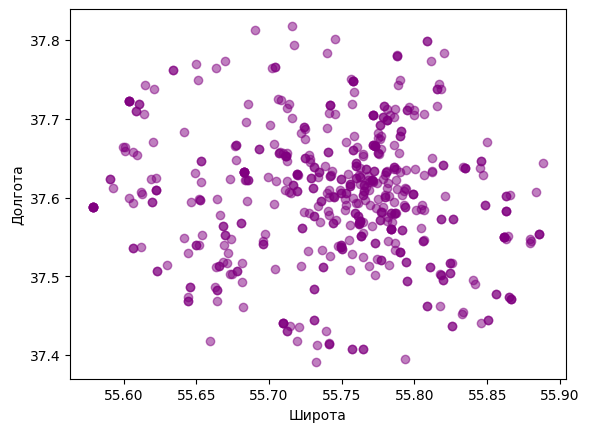

In [28]:
latitudes = []
longitudes = []

for job in jobs:
    for company in companies_within_MRR[job]:
        latitudes.append(company.coordinates[0])
        longitudes.append(company.coordinates[1])

plt.scatter(latitudes, longitudes, alpha = 0.5, color = "purple")
plt.xlabel('Широта')
plt.ylabel('Долгота')
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [29]:
companies_names = [company.name for job in jobs for company in companies_within_MRR[job]]
companies_salary_from = [company.salary[0] if company.salary[0] != None
                         else "Не указано" for job in jobs for company in companies_within_MRR[job]]
companies_salary_to = [company.salary[1] if company.salary[1] != None
                       else "Не указано" for job in jobs for company in companies_within_MRR[job]]
colours = ["Режиссер"] * len(companies_within_MRR["Режиссер"])
colours += ["Дальнобойщик"] * len(companies_within_MRR["Дальнобойщик"])
colours += ["Хореограф"] * len(companies_within_MRR["Хореограф"])
colours += ["Флорист"] * len(companies_within_MRR["Флорист"])
colours += ["Клеевар"] * len(companies_within_MRR["Клеевар"])


import plotly.express as px

fig = px.scatter_mapbox(
    lat = latitudes,
    lon = longitudes,
    hover_name = companies_names,
    hover_data = {"Salary from" : companies_salary_from, "Salary to" : companies_salary_to},
    color = colours,
    height=600,
    width=800,
    opacity=0.5,
    )
fig.update_traces(marker={'size': 10})
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(mapbox_bounds={"west": 37, "east": 38, "south": 50, "north": 60})
fig.show()


Подсчитаем также среднюю зарплату по данным профессиям

In [30]:
average_salary = {}

for job in jobs:
  sum_salary = 0
  salary_specified_counter = 0;
  for company in companies_within_MRR[job]:
    if company.salary[0] != None:
      salary_specified_counter += 1
      if company.salary[1] != None:
        sum_salary += (company.salary[0] + company.salary[1]) / 2
      else:
        sum_salary += company.salary[0]
  average_salary[job] = sum_salary / salary_specified_counter

average_salary

{'Режиссер': 106095.23809523809,
 'Дальнобойщик': 215430.81632653062,
 'Хореограф': 203439.39393939395,
 'Флорист': 74201.2987012987,
 'Клеевар': 84044.8275862069}

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Из рассмотренных профессий наибольший спрос на флористов и дальнобойщиков.

Средняя зарплата (в порядке убывания): дальнобойщики, хореографы, режиссеры, клеевары, флористы, при этом величина зарплаты от района не зависит.

Больше всего вакансий в центральных районах города: в Тверском, Басманном, Красносельском. В Новогиреево, Щукино, Хорошево-Мневниках, Люблино, Вешняках, Очаково-Матвеевском и еще нескольких вакансий не наблюдается.
Почти все вакансии хореографа расположены в пределах ТТК, вакансии остальных профессий можно найти в любом округе.


## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [31]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 40.3MB/s]


Создадим DataFrame:

In [32]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [33]:
diamonds.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [34]:
len(diamonds)

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [35]:
min_price = 1000000000000000000
min_price_number = 0
max_price = 0
max_price_number = 0

for i in range(len(diamonds)):
  if diamonds["total_sales_price"][i] > max_price:
    max_price = diamonds["total_sales_price"][i]
    max_price_number = i
  if diamonds["total_sales_price"][i] < min_price:
    min_price = diamonds["total_sales_price"][i]
    min_price_number = i

print(max_price_number, "-", max_price)
print(min_price_number, "-", min_price)

219702 - 1449881
0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [36]:
counter = 0

for key in diamonds.keys():
  for value in diamonds[key].tolist():
    if pd.isna(value) or value == "unknown":
      counter += 1
counter

1891168

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [37]:
have_spaces = set()
for key in diamonds.keys():
  for value in diamonds[key].tolist():
    if pd.isna(value) or value == "unknown":
      have_spaces.add(key)

have_spaces

{'color',
 'culet_condition',
 'culet_size',
 'cut_quality',
 'eye_clean',
 'fancy_color_dominant_color',
 'fancy_color_intensity',
 'fancy_color_overtone',
 'fancy_color_secondary_color',
 'fluor_color',
 'fluor_intensity',
 'girdle_max',
 'girdle_min'}

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [38]:
fancy_fluor_columns = set()

for key in diamonds.keys():
  if key.find("fancy_color_") == 0 or key.find("fluor_") == 0:
    fancy_fluor_columns.add(key)
len(fancy_fluor_columns)

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [39]:
counter = 0

for key in fancy_fluor_columns:
  for value in diamonds[key].tolist():
    if not(pd.isna(value)) and value != "unknown":
      counter += 1

counter

111586

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [40]:
for key in fancy_fluor_columns:
  diamonds.pop(key)
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,unknown,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,N,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [41]:
culet_columns = set()

for key in diamonds.keys():
  if key.find("culet_") == 0:
    culet_columns.add(key)
print(len(culet_columns))

counter = 0

for key in culet_columns:
  for value in diamonds[key].tolist():
    if not(pd.isna(value)) and value != "unknown":
      counter += 1

print(counter)

for key in culet_columns:
  diamonds.pop(key)
diamonds

2
149282


,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [42]:
sum(diamonds["total_sales_price"].tolist()) / 1000

1517721.991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
# your code here

(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
# your code here

(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
# your code here

>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
# your code here

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

In [ ]:
# your code here

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

In [ ]:
# your code here

(2 балла) Постройте график `вес бриллианта - стоимость`:

In [ ]:
# your code here

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

In [ ]:
# your code here

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Ваши выводы здесь :)

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [43]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
data_frame = pd.DataFrame({"meas_length" : diamonds["meas_length"].tolist(),
                           "meas_width" : diamonds["meas_width"].tolist(),
                           "meas_depth" : diamonds["meas_depth"].tolist(),
                           "total_sales_price" : diamonds["total_sales_price"].tolist()})
data_frame[:10]

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [44]:
data_frame = data_frame.sample(frac=1)
data_frame

,meas_length,meas_width,meas_depth,total_sales_price
132238,5.34,5.39,3.38,2988
140218,5.27,5.32,3.37,3326
118769,5.11,5.14,3.16,2358
162090,7.31,5.15,3.28,4716
106582,5.56,5.62,3.56,1842
...,...,...,...,...
216888,11.81,11.00,7.76,97416
159589,7.43,5.22,3.08,4535
105368,6.35,4.37,2.84,1836
156253,5.89,5.97,3.76,4076


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [45]:
data_frame.insert(4, "Minkowski_sum",
                 [(data_frame['meas_length'][data_frame.index[i]] ** 3 +
                   data_frame['meas_width'][data_frame.index[i]] ** 3 +
                   data_frame['meas_depth'][data_frame.index[i]] ** 3)**(1 / 3)
                   for i in range (len(data_frame))])
data_frame

,meas_length,meas_width,meas_depth,total_sales_price,Minkowski_sum
132238,5.34,5.39,3.38,2988,7.030335
140218,5.27,5.32,3.37,3326,6.946564
118769,5.11,5.14,3.16,2358,6.700156
162090,7.31,5.15,3.28,4716,8.254800
106582,5.56,5.62,3.56,1842,7.334149
...,...,...,...,...,...
216888,11.81,11.00,7.76,97416,15.103727
159589,7.43,5.22,3.08,4535,8.347342
105368,6.35,4.37,2.84,1836,7.129610
156253,5.89,5.97,3.76,4076,7.776469


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [46]:
new_data_frame = pd.DataFrame({"Minkowski_sum" : data_frame["Minkowski_sum"].tolist(), " total_sales_price" : data_frame["total_sales_price"].tolist()}, index = data_frame.index)

new_data_frame

,Minkowski_sum,total_sales_price
132238,7.030335,2988
140218,6.946564,3326
118769,6.700156,2358
162090,8.254800,4716
106582,7.334149,1842
...,...,...
216888,15.103727,97416
159589,8.347342,4535
105368,7.129610,1836
156253,7.776469,4076


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [ ]:
# your code here

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

In [ ]:
# your code here

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

In [ ]:
# your code here

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
# your code here

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
# your code here

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)